# XGBoost
- 파이썬 래퍼, 사이킷런 래퍼 비교
- 랜덤 포레스트와 비교

In [21]:
# XGBoost 버전 확인
import xgboost
print(xgboost.__version__)

0.90


## 유방암 데이터
- 악성 0, 양성 1
### (1) 파이썬 래버 방식
- 패키지: xgboost
- 병렬처리과 조기 중단 기능 (num_rounds 이내에 종료 가능)
- 중요도 시각화 함수 plot_importance 제공
- xgb.train() 함수를 사용 (fit 이 아니라)

In [2]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [4]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=9)
print(X_train.shape , X_test.shape)


(455, 30) (114, 30)


- 별도의 xgoost 전용 데이터 세트 객체인 DMatrix를 사용한다 (data, label 지정)
- 데이터프레임.values 필요

In [5]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

### 하이퍼 파라미터 설정
- 하이퍼파라미터는 딕셔너리 형태로 준다
- XGBClassifier를 사용할 때는 eta 대신 learning_rate사용)

In [6]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss',
           'early_stoppings':50
        }
num_rounds = 400

- xgb.train() 함수로 학습시킨다
- 조기 중단을 검사하기 위해서 검증 데이터셋인 eval_set과 eval_metric 지정: 'eval'
- 훈련 데이터는 'train'으로 지정
- predict()는 분류 확률을 리턴한다 ( > 0.5 로직 필요)

In [22]:
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , 
                      num_boost_round=num_rounds , evals=wlist )

[0]	train-logloss:0.608365	eval-logloss:0.614498
[1]	train-logloss:0.540282	eval-logloss:0.548604
[2]	train-logloss:0.48181	eval-logloss:0.499182
[3]	train-logloss:0.431493	eval-logloss:0.453039
[4]	train-logloss:0.390147	eval-logloss:0.414774
[5]	train-logloss:0.352733	eval-logloss:0.384982
[6]	train-logloss:0.319774	eval-logloss:0.355509
[7]	train-logloss:0.292547	eval-logloss:0.329822
[8]	train-logloss:0.267143	eval-logloss:0.311122
[9]	train-logloss:0.243862	eval-logloss:0.288465
[10]	train-logloss:0.223634	eval-logloss:0.272143
[11]	train-logloss:0.204901	eval-logloss:0.256379
[12]	train-logloss:0.188372	eval-logloss:0.241333
[13]	train-logloss:0.173465	eval-logloss:0.228977
[14]	train-logloss:0.160212	eval-logloss:0.218131
[15]	train-logloss:0.148668	eval-logloss:0.207635
[16]	train-logloss:0.137978	eval-logloss:0.199034
[17]	train-logloss:0.129548	eval-logloss:0.192091
[18]	train-logloss:0.120828	eval-logloss:0.183304
[19]	train-logloss:0.112602	eval-logloss:0.176324
[20]	train-

[164]	train-logloss:0.007429	eval-logloss:0.095618
[165]	train-logloss:0.007402	eval-logloss:0.095775
[166]	train-logloss:0.007371	eval-logloss:0.095722
[167]	train-logloss:0.007353	eval-logloss:0.096003
[168]	train-logloss:0.007334	eval-logloss:0.095927
[169]	train-logloss:0.007285	eval-logloss:0.095686
[170]	train-logloss:0.007267	eval-logloss:0.095818
[171]	train-logloss:0.007248	eval-logloss:0.095701
[172]	train-logloss:0.00723	eval-logloss:0.095978
[173]	train-logloss:0.007212	eval-logloss:0.096249
[174]	train-logloss:0.007194	eval-logloss:0.09615
[175]	train-logloss:0.007177	eval-logloss:0.09604
[176]	train-logloss:0.007159	eval-logloss:0.096193
[177]	train-logloss:0.007142	eval-logloss:0.096147
[178]	train-logloss:0.007124	eval-logloss:0.096308
[179]	train-logloss:0.007108	eval-logloss:0.096219
[180]	train-logloss:0.007091	eval-logloss:0.096489
[181]	train-logloss:0.007074	eval-logloss:0.096377
[182]	train-logloss:0.007057	eval-logloss:0.096183
[183]	train-logloss:0.00704	eval-l

[326]	train-logloss:0.005534	eval-logloss:0.097766
[327]	train-logloss:0.005527	eval-logloss:0.097749
[328]	train-logloss:0.005521	eval-logloss:0.097561
[329]	train-logloss:0.005514	eval-logloss:0.097613
[330]	train-logloss:0.005508	eval-logloss:0.097714
[331]	train-logloss:0.005501	eval-logloss:0.097731
[332]	train-logloss:0.005494	eval-logloss:0.09766
[333]	train-logloss:0.005488	eval-logloss:0.097712
[334]	train-logloss:0.005482	eval-logloss:0.097813
[335]	train-logloss:0.005475	eval-logloss:0.097629
[336]	train-logloss:0.005469	eval-logloss:0.097648
[337]	train-logloss:0.005463	eval-logloss:0.097611
[338]	train-logloss:0.005456	eval-logloss:0.097713
[339]	train-logloss:0.00545	eval-logloss:0.097646
[340]	train-logloss:0.005444	eval-logloss:0.097698
[341]	train-logloss:0.005438	eval-logloss:0.097676
[342]	train-logloss:0.005432	eval-logloss:0.097695
[343]	train-logloss:0.005426	eval-logloss:0.097658
[344]	train-logloss:0.00542	eval-logloss:0.097758
[345]	train-logloss:0.005413	eval-

In [8]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과 10개만 표시, 예측 확률')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.862 0.995 0.001 0.974 0.999 0.    0.    0.    0.999 0.   ]
예측값 10개만 표시: [1, 1, 0, 1, 1, 0, 0, 0, 1, 0]


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('컨퓨전 매트릭스')
    print(confusion)
    print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}, F1: {3:.3f},\
    AUC:{4:.3f}'.format(accuracy, precision, recall, f1, roc_auc))

In [28]:
get_clf_eval(y_test , preds)

컨퓨전 매트릭스
[[35  5]
 [ 0 74]]
정확도: 0.956, 정밀도: 0.937, 재현율: 1.000,F1: 0.967,    AUC:0.938


### 특성 중요도 출력 
- plot_importance
- 결정 트리처럼 트리구조 시각화도 가능하다 (Graphviz 사용)
- 교차검증을 위해서 cv()를 제공한다

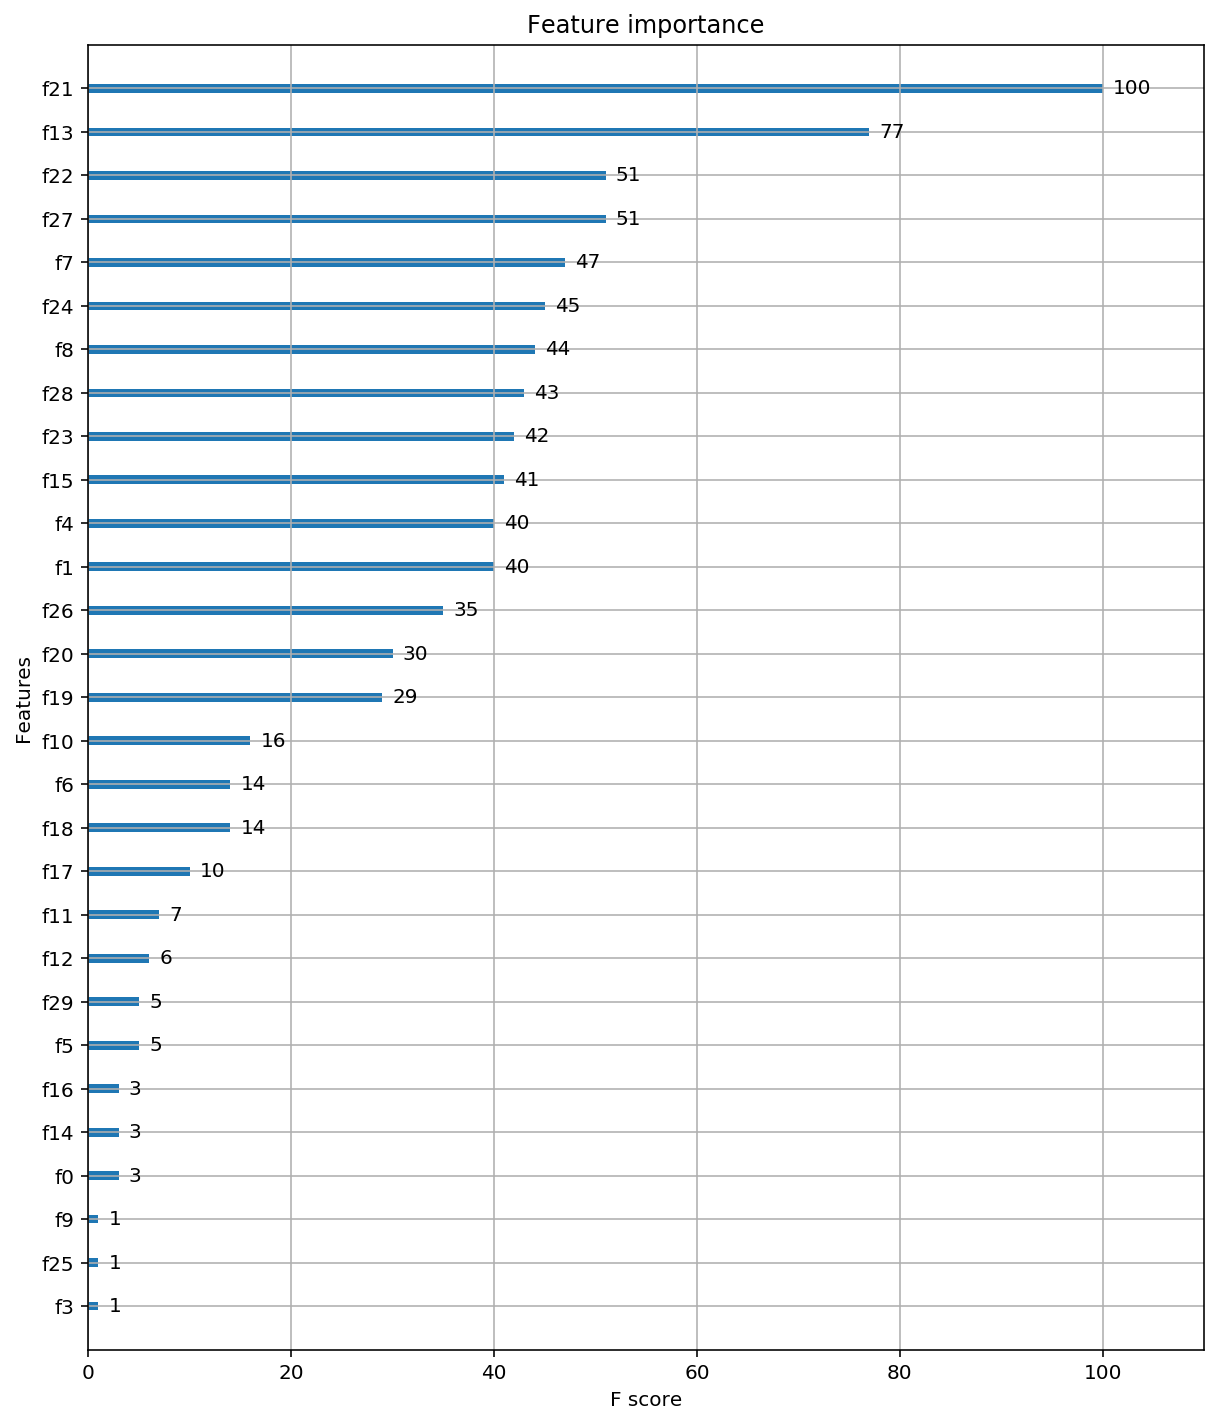

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

### (2) 사이킷런 래퍼 방식
- 사이킷런의 Estimator를 상속하여 만들었다
- 따라서 fit(), predict() 사용 가능
- GridSearchCV, Pipeline등의 사이킷런 유틸리티 사용 가능
- XGBClassifier, XGBRegressor 제공
- subsample 하이퍼 파라미터 사용 (파이썬 래퍼에서는 sub_sample)
- n_estimators 사용 (num_rounds 대신) - 아래에서 400
- 조기 종료 설정 (아래에서 100)

In [30]:
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, 
                eval_metric="logloss", eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.614498
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.548604
[2]	validation_0-logloss:0.499182
[3]	validation_0-logloss:0.453039
[4]	validation_0-logloss:0.414774
[5]	validation_0-logloss:0.384982
[6]	validation_0-logloss:0.355509
[7]	validation_0-logloss:0.329822
[8]	validation_0-logloss:0.311122
[9]	validation_0-logloss:0.288465
[10]	validation_0-logloss:0.272143
[11]	validation_0-logloss:0.256379
[12]	validation_0-logloss:0.241333
[13]	validation_0-logloss:0.228977
[14]	validation_0-logloss:0.218131
[15]	validation_0-logloss:0.207635
[16]	validation_0-logloss:0.199034
[17]	validation_0-logloss:0.192091
[18]	validation_0-logloss:0.183304
[19]	validation_0-logloss:0.176324
[20]	validation_0-logloss:0.169089
[21]	validation_0-logloss:0.1642
[22]	validation_0-logloss:0.159353
[23]	validation_0-logloss:0.155145
[24]	validation_0-logloss:0.149968
[25]	validation_0-logloss:0.146876
[26]	validation_0-logloss:0.14458

In [16]:
get_clf_eval(y_test , ws100_preds)

오차 행렬
[[36  4]
 [ 0 74]]
정확도: 0.9649, 정밀도: 0.9487, 재현율: 1.0000,    F1: 0.9737, AUC:0.9500


### 조기 종료를 10으로
- early_stopping_rounds를 10으로 설정
- 너무 일찍 종료될 수 있다

In [31]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
get_clf_eval(y_test , ws10_preds)

[0]	validation_0-logloss:0.614498
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.548604
[2]	validation_0-logloss:0.499182
[3]	validation_0-logloss:0.453039
[4]	validation_0-logloss:0.414774
[5]	validation_0-logloss:0.384982
[6]	validation_0-logloss:0.355509
[7]	validation_0-logloss:0.329822
[8]	validation_0-logloss:0.311122
[9]	validation_0-logloss:0.288465
[10]	validation_0-logloss:0.272143
[11]	validation_0-logloss:0.256379
[12]	validation_0-logloss:0.241333
[13]	validation_0-logloss:0.228977
[14]	validation_0-logloss:0.218131
[15]	validation_0-logloss:0.207635
[16]	validation_0-logloss:0.199034
[17]	validation_0-logloss:0.192091
[18]	validation_0-logloss:0.183304
[19]	validation_0-logloss:0.176324
[20]	validation_0-logloss:0.169089
[21]	validation_0-logloss:0.1642
[22]	validation_0-logloss:0.159353
[23]	validation_0-logloss:0.155145
[24]	validation_0-logloss:0.149968
[25]	validation_0-logloss:0.146876
[26]	validation_0-logloss:0.144583

- 특성 중요도 출력

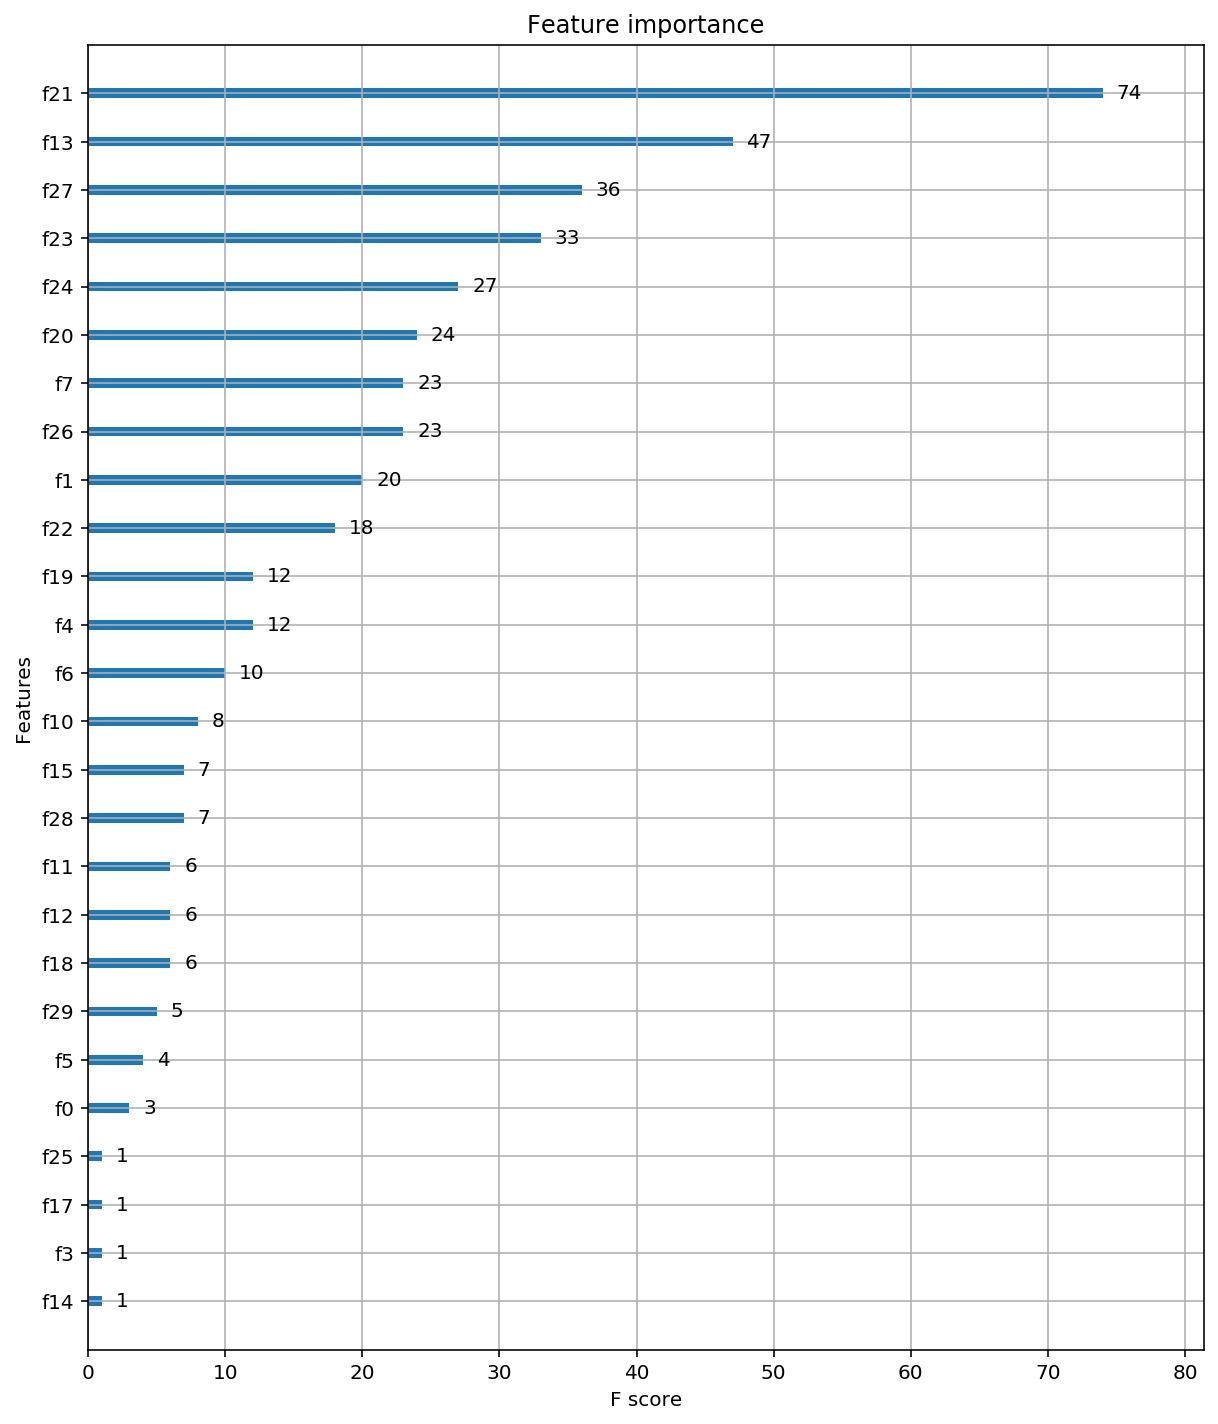

In [32]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

## (3)랜덤 포레스트와 비교

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_p = rfc.predict(X_test)
get_clf_eval(y_test , y_p)

컨퓨전 매트릭스
[[36  4]
 [ 0 74]]
정확도: 0.965, 정밀도: 0.949, 재현율: 1.000,F1: 0.974,    AUC:0.950


# LightGBM 
- 코랩에서 실행

In [6]:
# 윈도우에서
#!pip install lightgbm

In [5]:
# 맥에서
#!brew install lightgbm

/bin/sh: brew: command not found


In [1]:
import lightgbm
# print(lightgbm.__version__)

In [2]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [5]:
dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test=train_test_split(ftr, target, 
                  test_size=0.2, random_state=156 )

lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=20, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
# preds = lgbm_wrapper.predict(X_test)


[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
ftr.shape, target.shape

((569, 30), (569,))

In [9]:
y_pred = lgbm_wrapper.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  4]
 [ 2 75]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.95      0.97      0.96        77

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [10]:
roc_auc_score(y_test, y_pred)

0.932958932958933

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9473684210526315

In [ ]:
y_pred = lgbm_wrapper.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

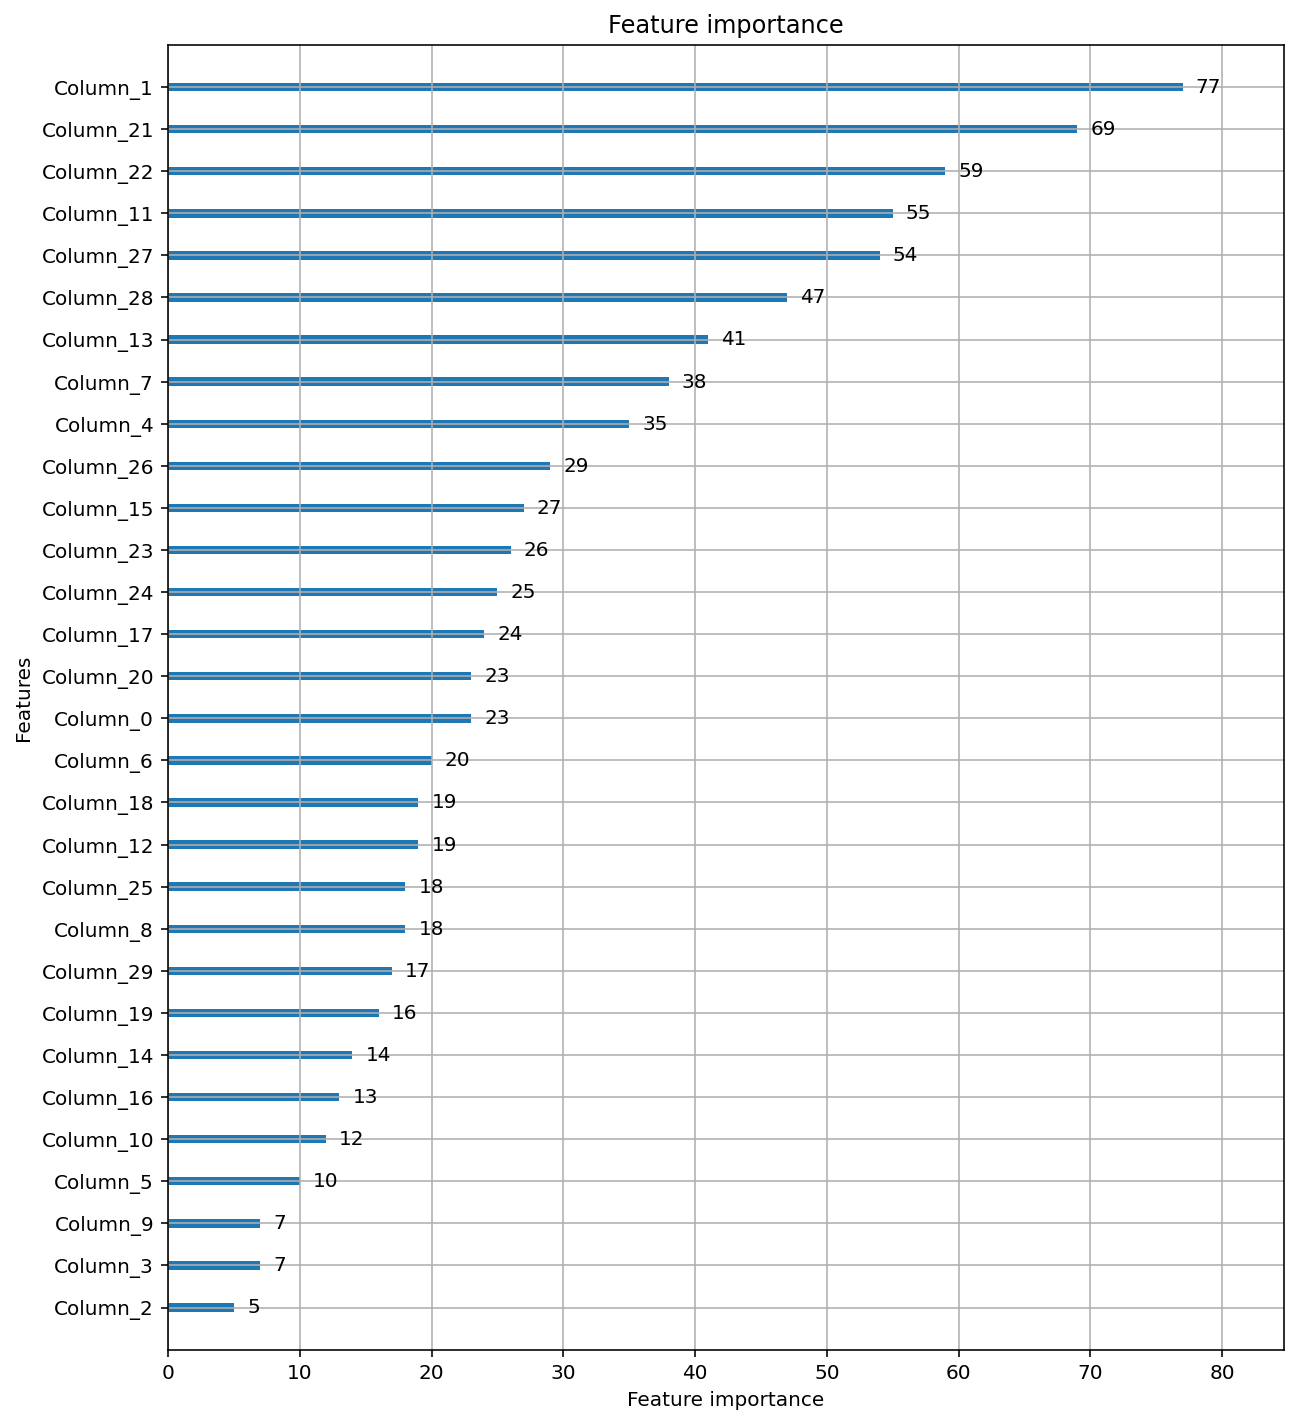

In [0]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)
# , feature_names=dataset.feature_names